In [8]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [9]:
IMAGE_SIZE = 256
CHANNELS = 3

In [10]:
!pip install split-folders

In [11]:
!splitfolders --output dataset --ratio 0.8 0.1 0.1 -- RiceDiseases

Copying files: 2254 files [00:01, 2125.85 files/s]


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="AugmentedImages"
)

Found 1802 images belonging to 5 classes.


In [15]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break


[[[0.9200768  0.91223365 0.9553709 ]
  [0.919568   0.91172487 0.9548621 ]
  [0.91905916 0.911216   0.9543533 ]
  ...
  [0.9325282  0.9286066  0.95213604]
  [0.94030505 0.9363835  0.9599129 ]
  [0.9450981  0.94117653 0.96470594]]

 [[0.9143791  0.906536   0.94967324]
  [0.9159055  0.90806234 0.9511996 ]
  [0.91743183 0.9095887  0.95272595]
  ...
  [0.93354577 0.9296242  0.9531536 ]
  [0.94132257 0.937401   0.9609304 ]
  [0.9450981  0.94117653 0.96470594]]

 [[0.89798707 0.89014393 0.9332812 ]
  [0.900531   0.89268786 0.9358251 ]
  [0.903075   0.89523184 0.9383691 ]
  ...
  [0.93456334 0.9306418  0.95417124]
  [0.9423402  0.9384186  0.96194804]
  [0.9450981  0.94117653 0.96470594]]

 ...

 [[0.8966272  0.88878405 0.943686  ]
  [0.8941177  0.8862746  0.94117653]
  [0.8873887  0.87954557 0.9344475 ]
  ...
  [0.86543673 0.86151516 0.9164171 ]
  [0.86645436 0.8625328  0.91743475]
  [0.8674719  0.8635503  0.9184523 ]]

 [[0.8961184  0.88827527 0.9431772 ]
  [0.8941177  0.8862746  0.94117653]


In [29]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 223 images belonging to 5 classes.


In [30]:
train_generator.class_indices

{'Bacterial_Leaf_Blight': 0,
 'Brown_Spot': 1,
 'Healthy': 2,
 'Leaf_Scald': 3,
 'Narrow_Brown_Spot': 4}

In [31]:
class_names = list(train_generator.class_indices.keys())
class_names

['Bacterial_Leaf_Blight',
 'Brown_Spot',
 'Healthy',
 'Leaf_Scald',
 'Narrow_Brown_Spot']

In [32]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 229 images belonging to 5 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


#### Build The Model


In [22]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5

def create_model():
    model = models.Sequential([
        layers.InputLayer(input_shape=input_shape),
        layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(n_classes, activation='softmax'),
    ])
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']
     )
    
    return model

In [24]:
model = create_model()

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [12]:
#Model Compile

In [13]:
# model.compile(
#     optimizer='adam',
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#     metrics=['accuracy']
# )

In [26]:
1802/32

56.3125

In [27]:
223/32

6.96875

In [33]:
history = model.fit(
    train_generator,
    steps_per_epoch=56,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=5,
)

Epoch 1/5
56/56 [==============================] - 50s 886ms/step - loss: 1.3864 - accuracy: 0.3904 - val_loss: 1.1226 - val_accuracy: 0.5208
Epoch 2/5
56/56 [==============================] - 50s 889ms/step - loss: 0.9630 - accuracy: 0.6158 - val_loss: 1.3112 - val_accuracy: 0.4844
Epoch 3/5
56/56 [==============================] - 53s 931ms/step - loss: 0.9074 - accuracy: 0.6362 - val_loss: 0.8643 - val_accuracy: 0.6406
Epoch 4/5
56/56 [==============================] - 55s 974ms/step - loss: 0.8151 - accuracy: 0.6757 - val_loss: 0.8568 - val_accuracy: 0.6250
Epoch 5/5
56/56 [==============================] - 54s 951ms/step - loss: 0.7460 - accuracy: 0.7062 - val_loss: 0.9376 - val_accuracy: 0.6667


In [34]:
scores = model.evaluate(test_generator)

8/8 [==============================] - 5s 604ms/step - loss: 0.7519 - accuracy: 0.6812


In [35]:
scores

[0.7519350051879883, 0.6812227368354797]

In [36]:
history


In [37]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 56}

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [65]:
history.history['accuracy']

[0.39039549231529236,
 0.6158192157745361,
 0.6361581683158875,
 0.6757062077522278,
 0.7062146663665771]

In [66]:
len(history.history['accuracy'])

5

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

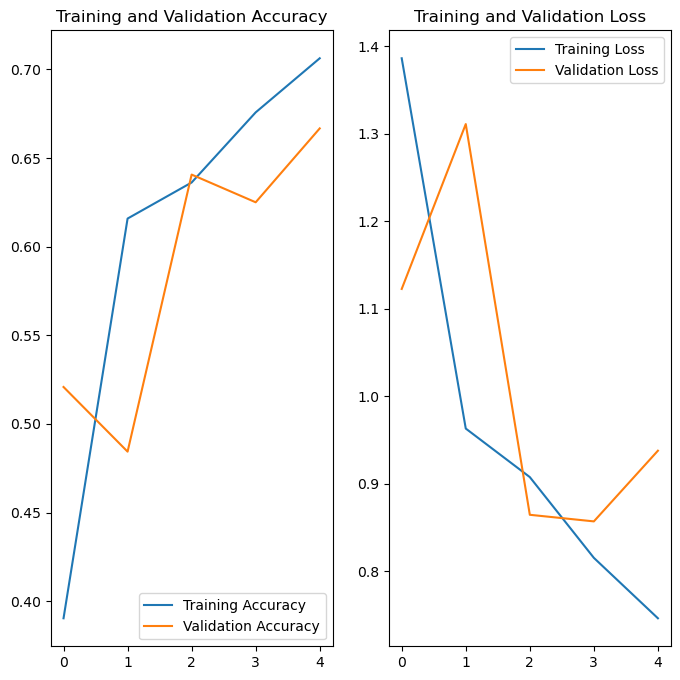

In [69]:
EPOCHS = 5

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Narrow_Brown_Spot
1/1 [==============================] - 0s 182ms/step
predicted label: Narrow_Brown_Spot


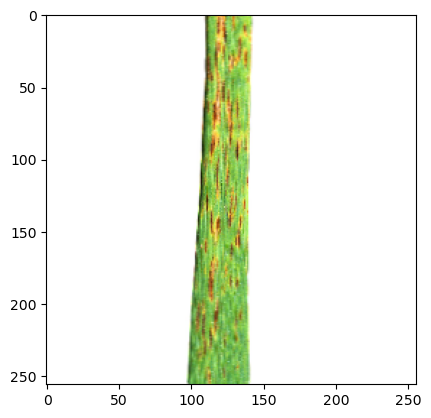

In [70]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [71]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    cofidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, cofidence

In [72]:
import numpy as np

In [73]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 14ms/step


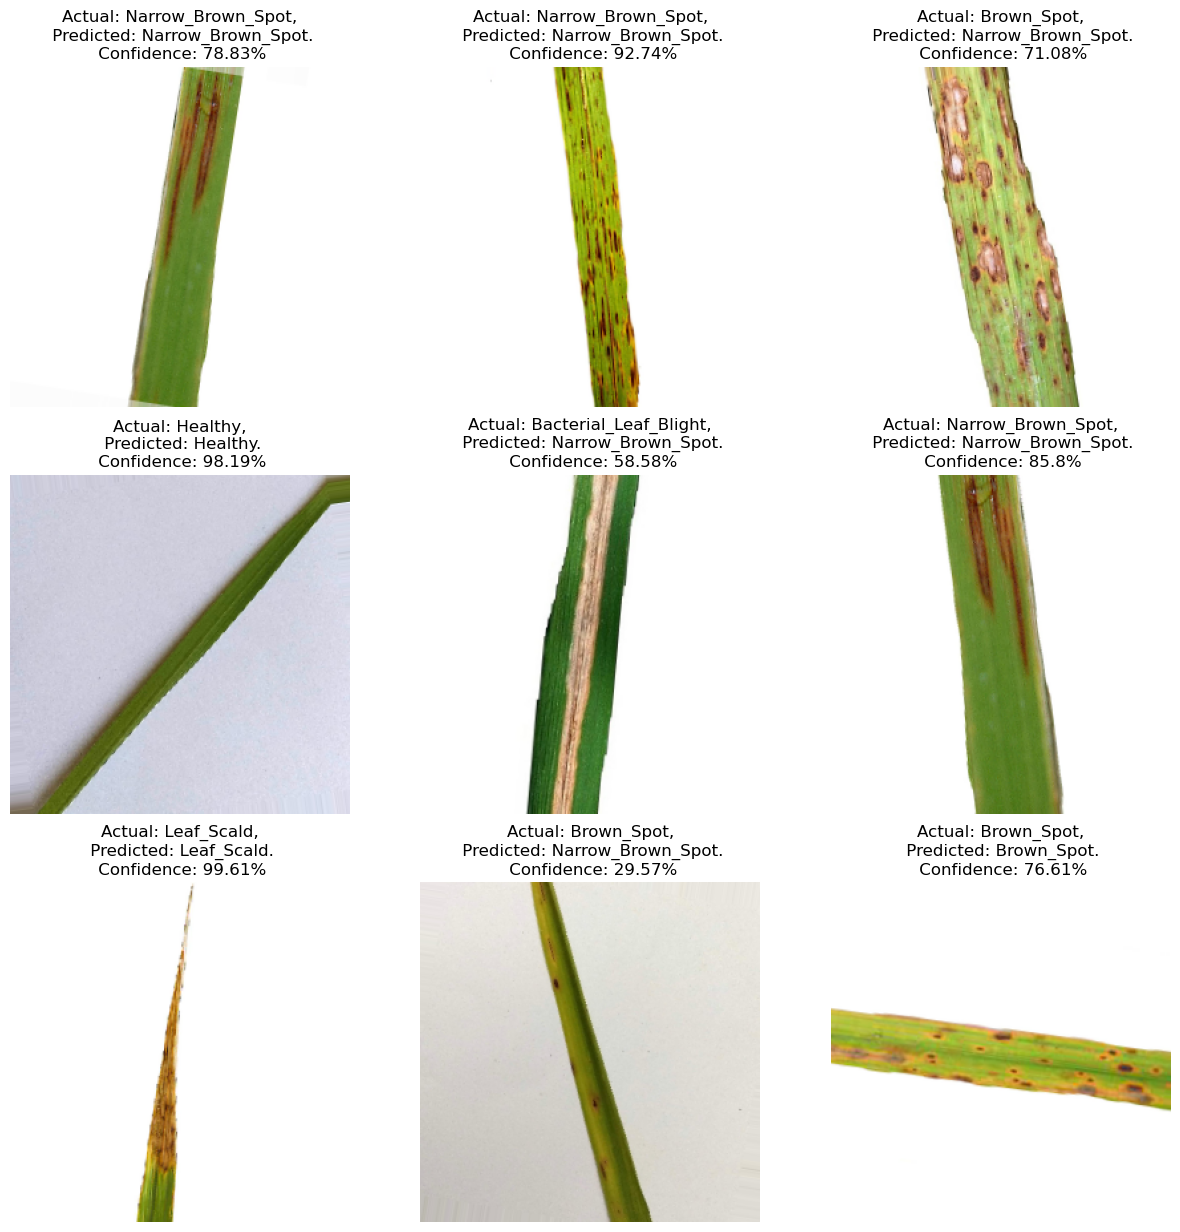

In [74]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [75]:
model.save("../rice.h5")

/Users/piuminavoda/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [79]:
new_model = create_model()
new_model = tf.keras.models.load_model('../rice.h5')

In [80]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [81]:
loss, acc = new_model.evaluate(test_generator, verbose = 2)
print(f"New model, accuracy: {100*acc:5.2f}%")

8/8 - 5s - loss: 0.7398 - accuracy: 0.6943 - 5s/epoch - 652ms/step
New model, accuracy: 69.43%
